## MHW detection

Code modified from Roselló et al. (2023). The original files can be found at https://github.com/pererossello/MHW_moving_fixed.git

In [ ]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import sys
import os

sys.path.append('..')

import utils
import main

In [ ]:
fold = "/home/bfernandez/Escritorio/OSR10/data/"
files = utils.dirtodict(fold)[".files"]
ds = xr.open_mfdataset(files, combine="by_coords")
residuals = xr.open_mfdataset('/home/bfernandez/Escritorio/OSR10/harmonics_trends/residuals_combined.nc')
harmonics = xr.open_mfdataset('/home/bfernandez/Escritorio/OSR10/harmonics_trends/harmonic_results_combined.nc')

In [ ]:
print(ds)
print(harmonics)

<xarray.Dataset> Size: 67GB
Dimensions:         (time: 15706, lat: 317, lon: 837)
Coordinates:
  * lat             (lat) float32 1kB 30.12 30.18 30.23 ... 45.87 45.92 45.97
  * lon             (lon) float32 3kB -5.563 -5.513 -5.463 ... 36.17 36.22 36.27
  * time            (time) datetime64[ns] 126kB 1982-01-01 ... 2024-12-31
Data variables:
    analysed_sst    (time, lat, lon) float64 33GB dask.array<chunksize=(365, 317, 837), meta=np.ndarray>
    analysis_error  (time, lat, lon) float64 33GB dask.array<chunksize=(365, 317, 837), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                CF-1.4 
    DSD_entry_id:               -GOS-L4HRfnd-MED
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Scaling_Equation:           (scale_factor*data) + add_offset
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    ...                         ...
    time_coverage_end:          20240928T070000Z
    ti

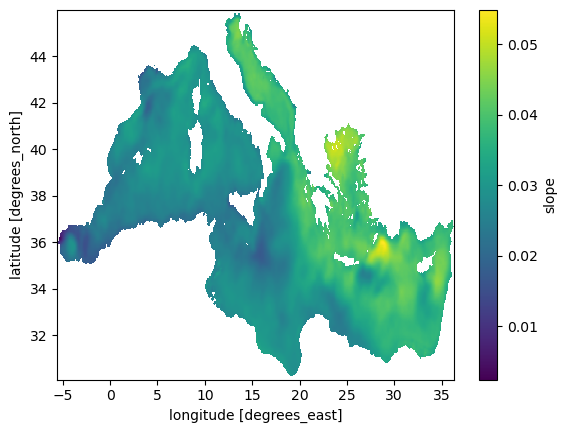

In [ ]:
harmonics['slope'].plot()

In [ ]:
sst = ds["analysed_sst"]
error = ds['analysis_error']
trend = harmonics['slope']
ds_lat   = ds.variables['lat'][:] 
ds_lon    = ds.variables['lon'][:] 
# data_along_axis = ds_arr[:, 0]
time_index = np.arange(len(ds['time']))
# Expand `time_index` to match the dimensions of `sst` and `trend`
time_index_expanded = xr.DataArray(
    time_index, dims=["time"], coords={"time": ds["time"]}
)

sst_det = sst - (trend/365.25)*time_index_expanded

ds_detrend = xr.Dataset(
    {
        "sst_detrend": (("time", "lat", "lon"), sst_det.data),
        "analysis_error": (("time", "lat", "lon"), error.data)
    },
    coords={
        "time": ds["time"],
        "lat": ds["lat"],
        "lon": ds["lon"]
    }
)
print(sst_det.data)

dask.array<sub, shape=(15706, 317, 837), dtype=float64, chunksize=(366, 317, 837), chunktype=numpy.ndarray>


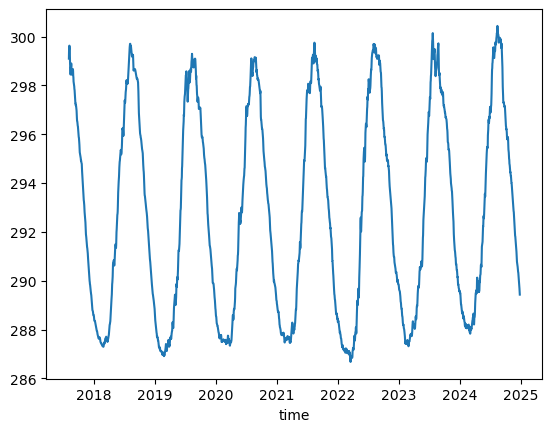

In [ ]:
sst_det_subset = sst_det.isel(time=slice(13000, 15700))
sst_det_mean_subset = sst_det_subset.mean(dim=["lat", "lon"], skipna=True)
sst_det_mean_subset.plot()

In [ ]:
### Fixed baseline 30 años
baseline_year_length = 30  # Set baseline period length
baseline_type = "fixed_baseline"  # Set type of baseline
out_folder = "/home/bfernandez/Escritorio/OSR10/results/"

main.MHW_metrics_satellite(
    ds,
    baseline_year_length,
    baseline_type,
    out_folder=out_folder,
    var="analysed_sst",
    distribution=False,
    error=True,
)

[1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024]
1982, [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1983, [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

<xarray.Dataset> Size: 2GB
Dimensions:                 (time: 43, lat: 317, lon: 837)
Coordinates:
  * lat                     (lat) float32 1kB 30.12 30.18 30.23 ... 45.92 45.97
  * lon                     (lon) float32 3kB -5.563 -5.513 ... 36.22 36.27
  * time                    (time) int64 344B 1982 1983 1984 ... 2022 2023 2024
Data variables: (12/21)
    MHS                     (time, lat, lon) float64 91MB nan nan ... nan nan
    MHW                     (time, lat, lon) float64 91MB nan nan ... nan nan
    MHW_cat_2               (time, lat, lon) float64 91MB nan nan ... nan nan
    MHW_cat_3               (time, lat, lon) float64 91MB nan nan ... nan nan
    MHW_cat_4               (time, lat, lon) float64 91MB nan nan ... nan nan
    mean_anomaly            (time, lat, lon) float64 91MB nan nan ... nan nan
    ...                      ...
    max_anomaly_pos         (time, lat, lon) float64 91MB nan nan ... nan nan
    max_anomaly_neg         (time, lat, lon) float64 91MB nan nan ... nan nan
    cumulative_anomaly_pos  (time, lat, lon) float64 91MB nan nan ... nan nan
    cumulative_anomaly_neg  (time, lat, lon) float64 91MB nan nan ... nan nan
    mean_duration_pos       (time, lat, lon) float64 91MB nan nan ... nan nan
    mean_duration_neg       (time, lat, lon) float64 91MB nan nan ... nan nan

In [ ]:
### Moving baseline 20 años
baseline_year_length = 20  # Set baseline period length
baseline_type = "moving_baseline"  # Set type of baseline
out_folder = "/home/bfernandez/Escritorio/OSR10/results/"

main.MHW_metrics_satellite(
    ds,
    baseline_year_length,
    baseline_type,
    out_folder=out_folder,
    var="analysed_sst",
    distribution=False,
    error=True,
)

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024]
2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 

<xarray.Dataset> Size: 1GB
Dimensions:                 (time: 23, lat: 317, lon: 837)
Coordinates:
  * lat                     (lat) float32 1kB 30.12 30.18 30.23 ... 45.92 45.97
  * lon                     (lon) float32 3kB -5.563 -5.513 ... 36.22 36.27
  * time                    (time) int64 184B 2002 2003 2004 ... 2022 2023 2024
Data variables: (12/21)
    MHS                     (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    MHW                     (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    MHW_cat_2               (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    MHW_cat_3               (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    MHW_cat_4               (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    mean_anomaly            (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    ...                      ...
    max_anomaly_pos         (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    max_anomaly_neg         (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    cumulative_anomaly_pos  (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    cumulative_anomaly_neg  (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    mean_duration_pos       (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0
    mean_duration_neg       (time, lat, lon) float64 49MB 0.0 0.0 ... 0.0 0.0

In [ ]:
### Detrended fixed baseline 30 años
baseline_year_length = 30  # Set baseline period length
baseline_type = "fixed_baseline"  # Set type of baseline
out_folder = "/home/bfernandez/Escritorio/OSR10/results/detrended/"

main.MHW_metrics_satellite(
    ds_detrend,
    baseline_year_length,
    baseline_type,
    out_folder=out_folder,
    var="sst_detrend",
    distribution=False,
    error=True,
)

[1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024]
1982, 1983, [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1984, [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 

<xarray.Dataset> Size: 2GB
Dimensions:                 (time: 43, lat: 317, lon: 837)
Coordinates:
  * lat                     (lat) float32 1kB 30.12 30.18 30.23 ... 45.92 45.97
  * lon                     (lon) float32 3kB -5.563 -5.513 ... 36.22 36.27
  * time                    (time) int64 344B 1982 1983 1984 ... 2022 2023 2024
Data variables: (12/21)
    MHS                     (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    MHW                     (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    MHW_cat_2               (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    MHW_cat_3               (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    MHW_cat_4               (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    mean_anomaly            (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    ...                      ...
    max_anomaly_pos         (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    max_anomaly_neg         (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    cumulative_anomaly_pos  (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    cumulative_anomaly_neg  (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    mean_duration_pos       (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan
    mean_duration_neg       (time, lat, lon) float64 91MB 0.0 0.0 ... nan nan